Utilizando el dataset exams.csv, calcula las siguientes probabilidades al seleccionar a un
estudiante al azar
1. Que su grupo étnico sea A o B
2. Que su preparación para el examen sea completa
3. Que tenga un puntaje en matemáticas superior o igual a 50
4. Que el nivel educacional de sus padres sea ‘high school”
5. Que el nivel educacional de sus padres sea ‘high school”, si se sabe que perteneceal grupo étnico A o B
6. Que su preparación para el examen sea completa, si se sabe que su puntaje enmatemáticas es superior o igual a 50


In [3]:
#primero leemos el archivo que nos proporcionan, importamos las librerias de pandas
import pandas as pd
examenes = pd.read_csv('exams.csv')

In [10]:
#revisamos las cabeceras y una muestra rapida de la info en el archivo
print(examenes.head())

   gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  
4               completed          78             73             68  


In [8]:
#revisamos las estadisticas basicas de forma rapida
print(examenes.describe())

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      60.000000      58.000000
50%      66.500000      70.000000      68.000000
75%      77.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000


In [31]:
#ahora para analizar la parte de probabilidades segun el archivo
#contaremos la cantidad de veces que aparece 'A' o 'B' en la columna 'grupo_etnico'
conteo_grupo_ab = examenes['race/ethnicity'].value_counts()[['group A', 'group B']].sum()

# Calcular la probabilidad
prob_grupo_ab = conteo_grupo_ab / len(examenes)
print("La probabilidad de que su grupo etnico sea A o B es:", prob_grupo_ab*100,"%")

La probabilidad de que su grupo etnico sea A o B es: 28.4 %


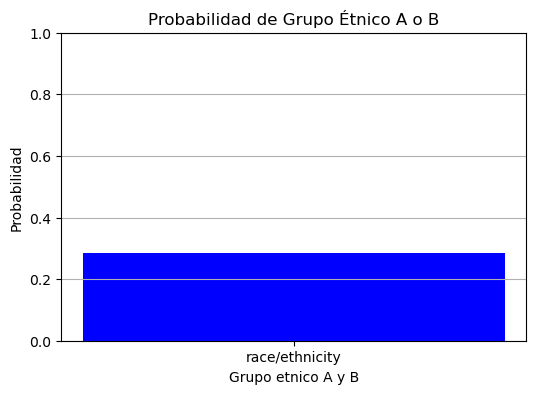

In [30]:

#tambien debemos graficarlo
import matplotlib.pyplot as plt

#Definir los datos para el gráfico
etnias = ['race/ethnicity']
probabilidades = [prob_grupo_ab]

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(etnias, probabilidades, color='blue')
plt.xlabel('Grupo etnico A y B')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de Grupo Étnico A o B')
plt.ylim(0, 1)  # Establecer el rango del eje y de 0 a 1
plt.grid(axis='y')  # Agregar cuadrícula en el eje y
plt.show()



In [34]:
#ahora pasamos al punto 2
# Contar la cantidad de veces que aparece 'completa' en la columna 'preparacion_examen'
conteo_prep_completa = examenes['test preparation course'].value_counts()['completed']

# Calcular la probabilidad
prob_prep_completa = conteo_prep_completa / len(examenes)
print("Que su preparación para el examen sea completa", prob_prep_completa*100 ,"%")

Que su preparación para el examen sea completa 33.5 %


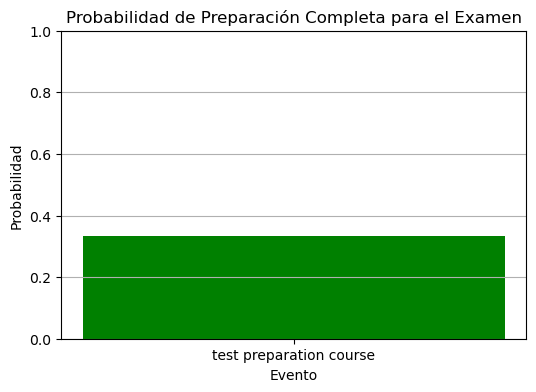

In [37]:
import matplotlib.pyplot as plt

# Definir los datos para el gráfico
eventos = ['test preparation course']
probabilidades = [prob_prep_completa]

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(eventos, probabilidades, color='green')
plt.xlabel('Evento')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de Preparación Completa para el Examen')
plt.ylim(0, 1)  # Establecer el rango del eje y de 0 a 1
plt.grid(axis='y')  # Agregar cuadrícula en el eje y
plt.show()


In [41]:
#contar la cantidad de veces que el puntaje en matemáticas es mayor o igual a 50
conteo_puntaje_mayor_50 = (examenes['math score'] >= 50).sum()

# Calcular la probabilidad
prob_puntaje_mayor_50 = conteo_puntaje_mayor_50 / len(examenes)
print("que el puntaje matematico sea mayor a 50 es el", prob_puntaje_mayor_50 *100 ,"%")

que el puntaje matematico sea mayor a 50 es el 85.5 %


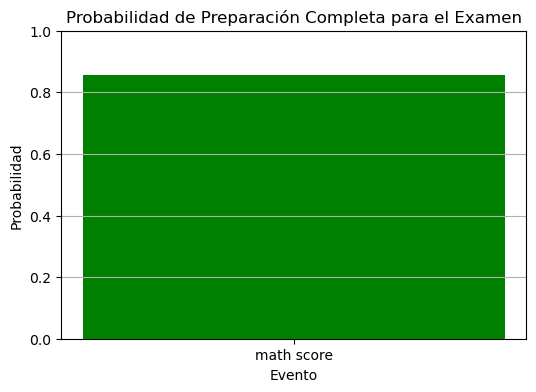

In [42]:
# Definir los datos para el gráfico
eventos = ['math score']
probabilidades = [prob_puntaje_mayor_50]

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(eventos, probabilidades, color='green')
plt.xlabel('Evento')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de Preparación Completa para el Examen')
plt.ylim(0, 1)  # Establecer el rango del eje y de 0 a 1
plt.grid(axis='y')  # Agregar cuadrícula en el eje y
plt.show()

In [43]:
# Contar la cantidad de veces que aparece 'high school' en la columna 'nivel_educacional_padres'
conteo_educacion_hs = examenes['parental level of education'].value_counts()['high school']

# Calcular la probabilidad
prob_educacion_hs = conteo_educacion_hs / len(examenes)
print("la probabilidad Que el nivel educacional de sus padres sea ‘high school”", prob_educacion_hs *100 ,"%")

la probabilidad Que el nivel educacional de sus padres sea ‘high school” 20.200000000000003 %


In [48]:
#Que el nivel educacional de sus padres sea ‘high school”, si se sabe que pertenece al grupo étnico A o B:
#aqui tenemos 2 casos, primero que el grupo etnico sea A o b
#y que en ese caso, su nivel educacional sea high school"
#lo resolvemos de forma manual con el teorema de bayes"

#Primero, filtramos el DataFrame para incluir solo los casos donde el grupo étnico es A o B:
df_ab = examenes[examenes['race/ethnicity'].isin(['group A', 'group B'])]

#contamow la cantidad de veces que aparece 'high school' en la columna 'nivel_educacional_padres' en el nuevo DataFrame
#Luego, contamos la cantidad de veces que aparece 'high school' en la columna 'nivel_educacional_padres' en el nuevo DataFrame df_ab:
conteo_educacion_hs_ab = df_ab['parental level of education'].value_counts()['high school']

# Calcular la probabilidad
prob_educacion_hs_ab = conteo_educacion_hs_ab / len(df_ab)
print("la probabilidad Que el nivel educacional de sus padres sea ‘high school”, si se sabe que pertenece al grupo étnico A o B”", prob_educacion_hs_ab *100 ,"%")

la probabilidad Que el nivel educacional de sus padres sea ‘high school”, si se sabe que pertenece al grupo étnico A o B” 19.014084507042252 %


In [51]:
# Filtrar el DataFrame para los casos donde el puntaje en matemáticas sea mayor o igual a 50
df_puntaje_mayor_50 = examenes[examenes['math score'] >= 50]

# Contar la cantidad de veces que aparece 'completa' en la columna 'preparacion_examen' en el nuevo DataFrame
conteo_prep_completa_puntaje_mayor_50 = df_puntaje_mayor_50['test preparation course'].value_counts()['completed']

# Calcular la probabilidad
prob_prep_completa_puntaje_mayor_50 = conteo_prep_completa_puntaje_mayor_50 / len(df_puntaje_mayor_50)
print("la probabilidad Que su preparación para el examen sea completa, si se sabe que su puntaje enmatemáticas es superior o igual a 50 es", prob_prep_completa_puntaje_mayor_50 *100 ,"%")

la probabilidad Que su preparación para el examen sea completa, si se sabe que su puntaje enmatemáticas es superior o igual a 50 es 35.08771929824561 %


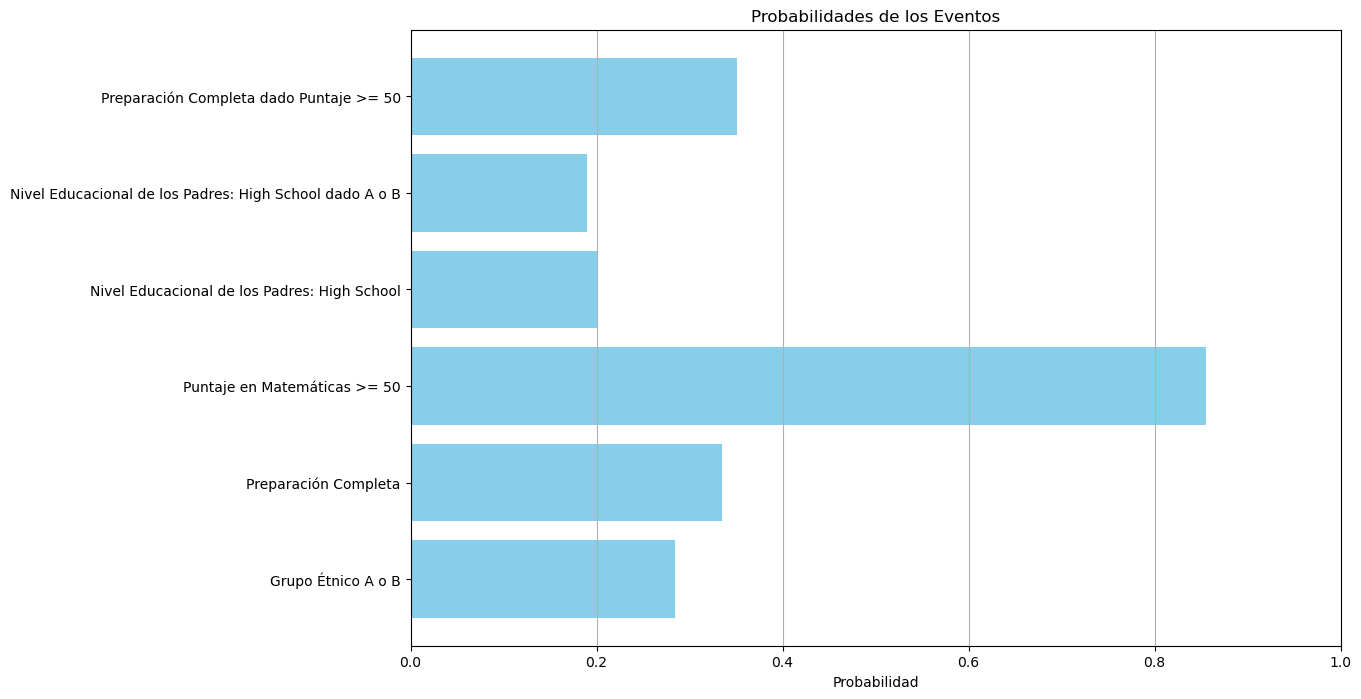

In [56]:
import matplotlib.pyplot as plt

# Definir los nombres de los eventos
eventos = ['Grupo Étnico A o B', 'Preparación Completa', 'Puntaje en Matemáticas >= 50', 
           'Nivel Educacional de los Padres: High School', 
           'Nivel Educacional de los Padres: High School dado A o B', 
           'Preparación Completa dado Puntaje >= 50']

# Definir las probabilidades correspondientes
probabilidades = [prob_grupo_ab, prob_prep_completa, prob_puntaje_mayor_50, 
                  prob_educacion_hs, prob_educacion_hs_ab, prob_prep_completa_puntaje_mayor_50]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(eventos, probabilidades, color='skyblue')
plt.xlabel('Probabilidad')
plt.title('Probabilidades de los Eventos')
plt.xlim(0, 1)  # Establecer el rango del eje x de 0 a 1
plt.grid(axis='x')  # Agregar cuadrícula en el eje x

plt.show()